# Employee Performance

Every year a lot of companies hire a number of employees. The companies invest time and money in training those employees, not just this but there are training programs within the companies for their existing employees as well. 

Attrition in human resources refers to the gradual loss of employees over time. In general, relatively high attrition is problematic for companies. HR professionals often assume a leadership role in designing company compensation programs, work culture and motivation systems that help the organization retain top employees.

A major problem in high employee attrition is its cost to an organization. Job postings, hiring processes, paperwork and new hire training are some of the common expenses of losing employees and replacing them. Additionally, regular employee turnover prohibits your organization from increasing its collective knowledge base and experience over time. 

In [81]:
# Importing Libaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from warnings import filterwarnings

pd.set_option('display.max_columns',1000)
pd.set_option('display.max_rows',1000)
pd.set_option('display.max_colwidth',1000)

In [82]:
# Loading dataset
employee_performance=pd.read_csv('E:\\UPGRAD-study\\Nikita\\Assignment\\Employee_Performance\\Employee_Performance.csv')

In [83]:
# Looking at the head
employee_performance.head()

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,OverTime,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,E1001000,32,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,10,3,4,55,3,2,4,1,No,12,4,10,2,2,10,7,0,8,No,3
1,E1001006,47,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,14,4,4,42,3,2,1,2,No,12,4,20,2,3,7,7,1,7,No,3
2,E1001007,40,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Frequently,5,4,4,48,2,3,1,5,Yes,21,3,20,2,3,18,13,1,12,No,4
3,E1001009,41,Male,Human Resources,Divorced,Human Resources,Manager,Travel_Rarely,10,4,2,73,2,5,4,3,No,15,2,23,2,2,21,6,12,6,No,3
4,E1001010,60,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,16,4,1,84,3,2,1,8,No,14,4,10,1,3,2,2,2,2,No,3


## Step 1: Data Cleaning and Preparation

In [84]:
# Looking at the shape of the dataset i.e no. of rows and columns in a dataset
employee_performance.shape

(1200, 28)

In [85]:
# Looking at the description
employee_performance.describe()

,Age,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,PerformanceRating
count,1200.000000,1200.000000,1200.00000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000
mean,36.918333,9.165833,2.89250,2.715833,65.981667,2.731667,2.067500,2.732500,2.665000,15.222500,2.725000,11.330000,2.785833,2.744167,7.077500,4.291667,2.194167,4.105000,2.948333
std,9.087289,8.176636,1.04412,1.090599,20.211302,0.707164,1.107836,1.100888,2.469384,3.625918,1.075642,7.797228,1.263446,0.699374,6.236899,3.613744,3.221560,3.541576,0.518866
min,18.000000,1.000000,1.00000,1.000000,30.000000,1.000000,1.000000,1.000000,0.000000,11.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2.000000
25%,30.000000,2.000000,2.00000,2.000000,48.000000,2.000000,1.000000,2.000000,1.000000,12.000000,2.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000,3.000000
50%,36.000000,7.000000,3.00000,3.000000,66.000000,3.000000,2.000000,3.000000,2.000000,14.000000,3.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000,3.000000
75%,43.000000,14.000000,4.00000,4.000000,83.000000,3.000000,3.000000,4.000000,4.000000,18.000000,4.000000,15.000000,3.000000,3.000000,10.000000,7.000000,3.000000,7.000000,3.000000
max,60.000000,29.000000,5.00000,4.000000,100.000000,4.000000,5.000000,4.000000,9.000000,25.000000,4.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000,4.000000


In [86]:
# Checking for info i.e no of rows,datatypes and null values
employee_performance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 28 columns):
EmpNumber                       1200 non-null object
Age                             1200 non-null int64
Gender                          1200 non-null object
EducationBackground             1200 non-null object
MaritalStatus                   1200 non-null object
EmpDepartment                   1200 non-null object
EmpJobRole                      1200 non-null object
BusinessTravelFrequency         1200 non-null object
DistanceFromHome                1200 non-null int64
EmpEducationLevel               1200 non-null int64
EmpEnvironmentSatisfaction      1200 non-null int64
EmpHourlyRate                   1200 non-null int64
EmpJobInvolvement               1200 non-null int64
EmpJobLevel                     1200 non-null int64
EmpJobSatisfaction              1200 non-null int64
NumCompaniesWorked              1200 non-null int64
OverTime                        1200 non-null object
E

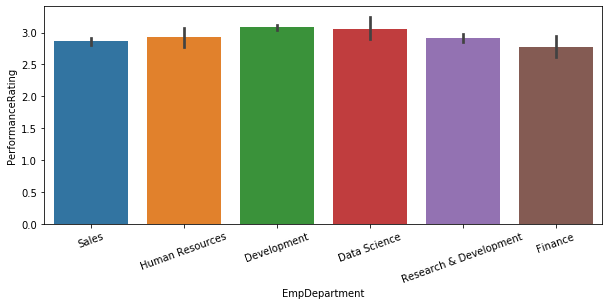

In [87]:
# Trying to answer the question visually
#1. Department wise performance
plt.figure(figsize=(10,4))
sns.barplot(x=employee_performance['EmpDepartment'],y=employee_performance['PerformanceRating'])
plt.xticks(rotation=20)
plt.show()

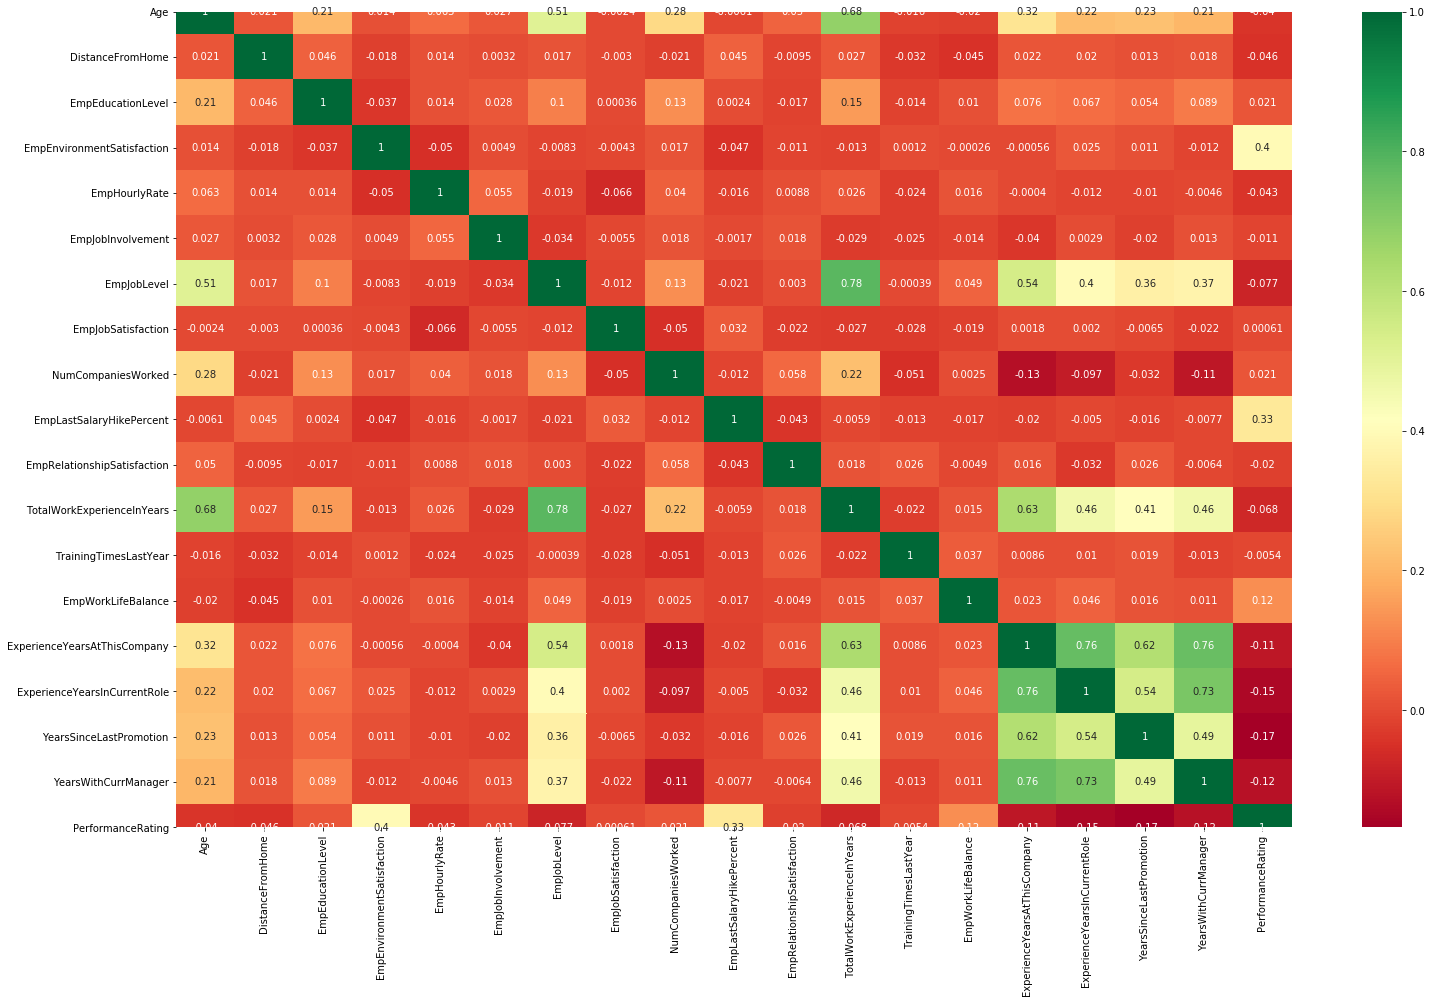

In [88]:
# From the below heat map we can now see which variables are poorly correlated and which ones are strongly correlated.corrmat = employee_performance.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(25,15))

#plot heat map
sns.heatmap(employee_performance[top_corr_features].corr(),annot=True,cmap="RdYlGn")
plt.show()

In [91]:
# Lets drop highly correlated columns
employee_performance.drop(['TotalWorkExperienceInYears','ExperienceYearsAtThisCompany','ExperienceYearsInCurrentRole','YearsWithCurrManager'],axis= 1,inplace=True)

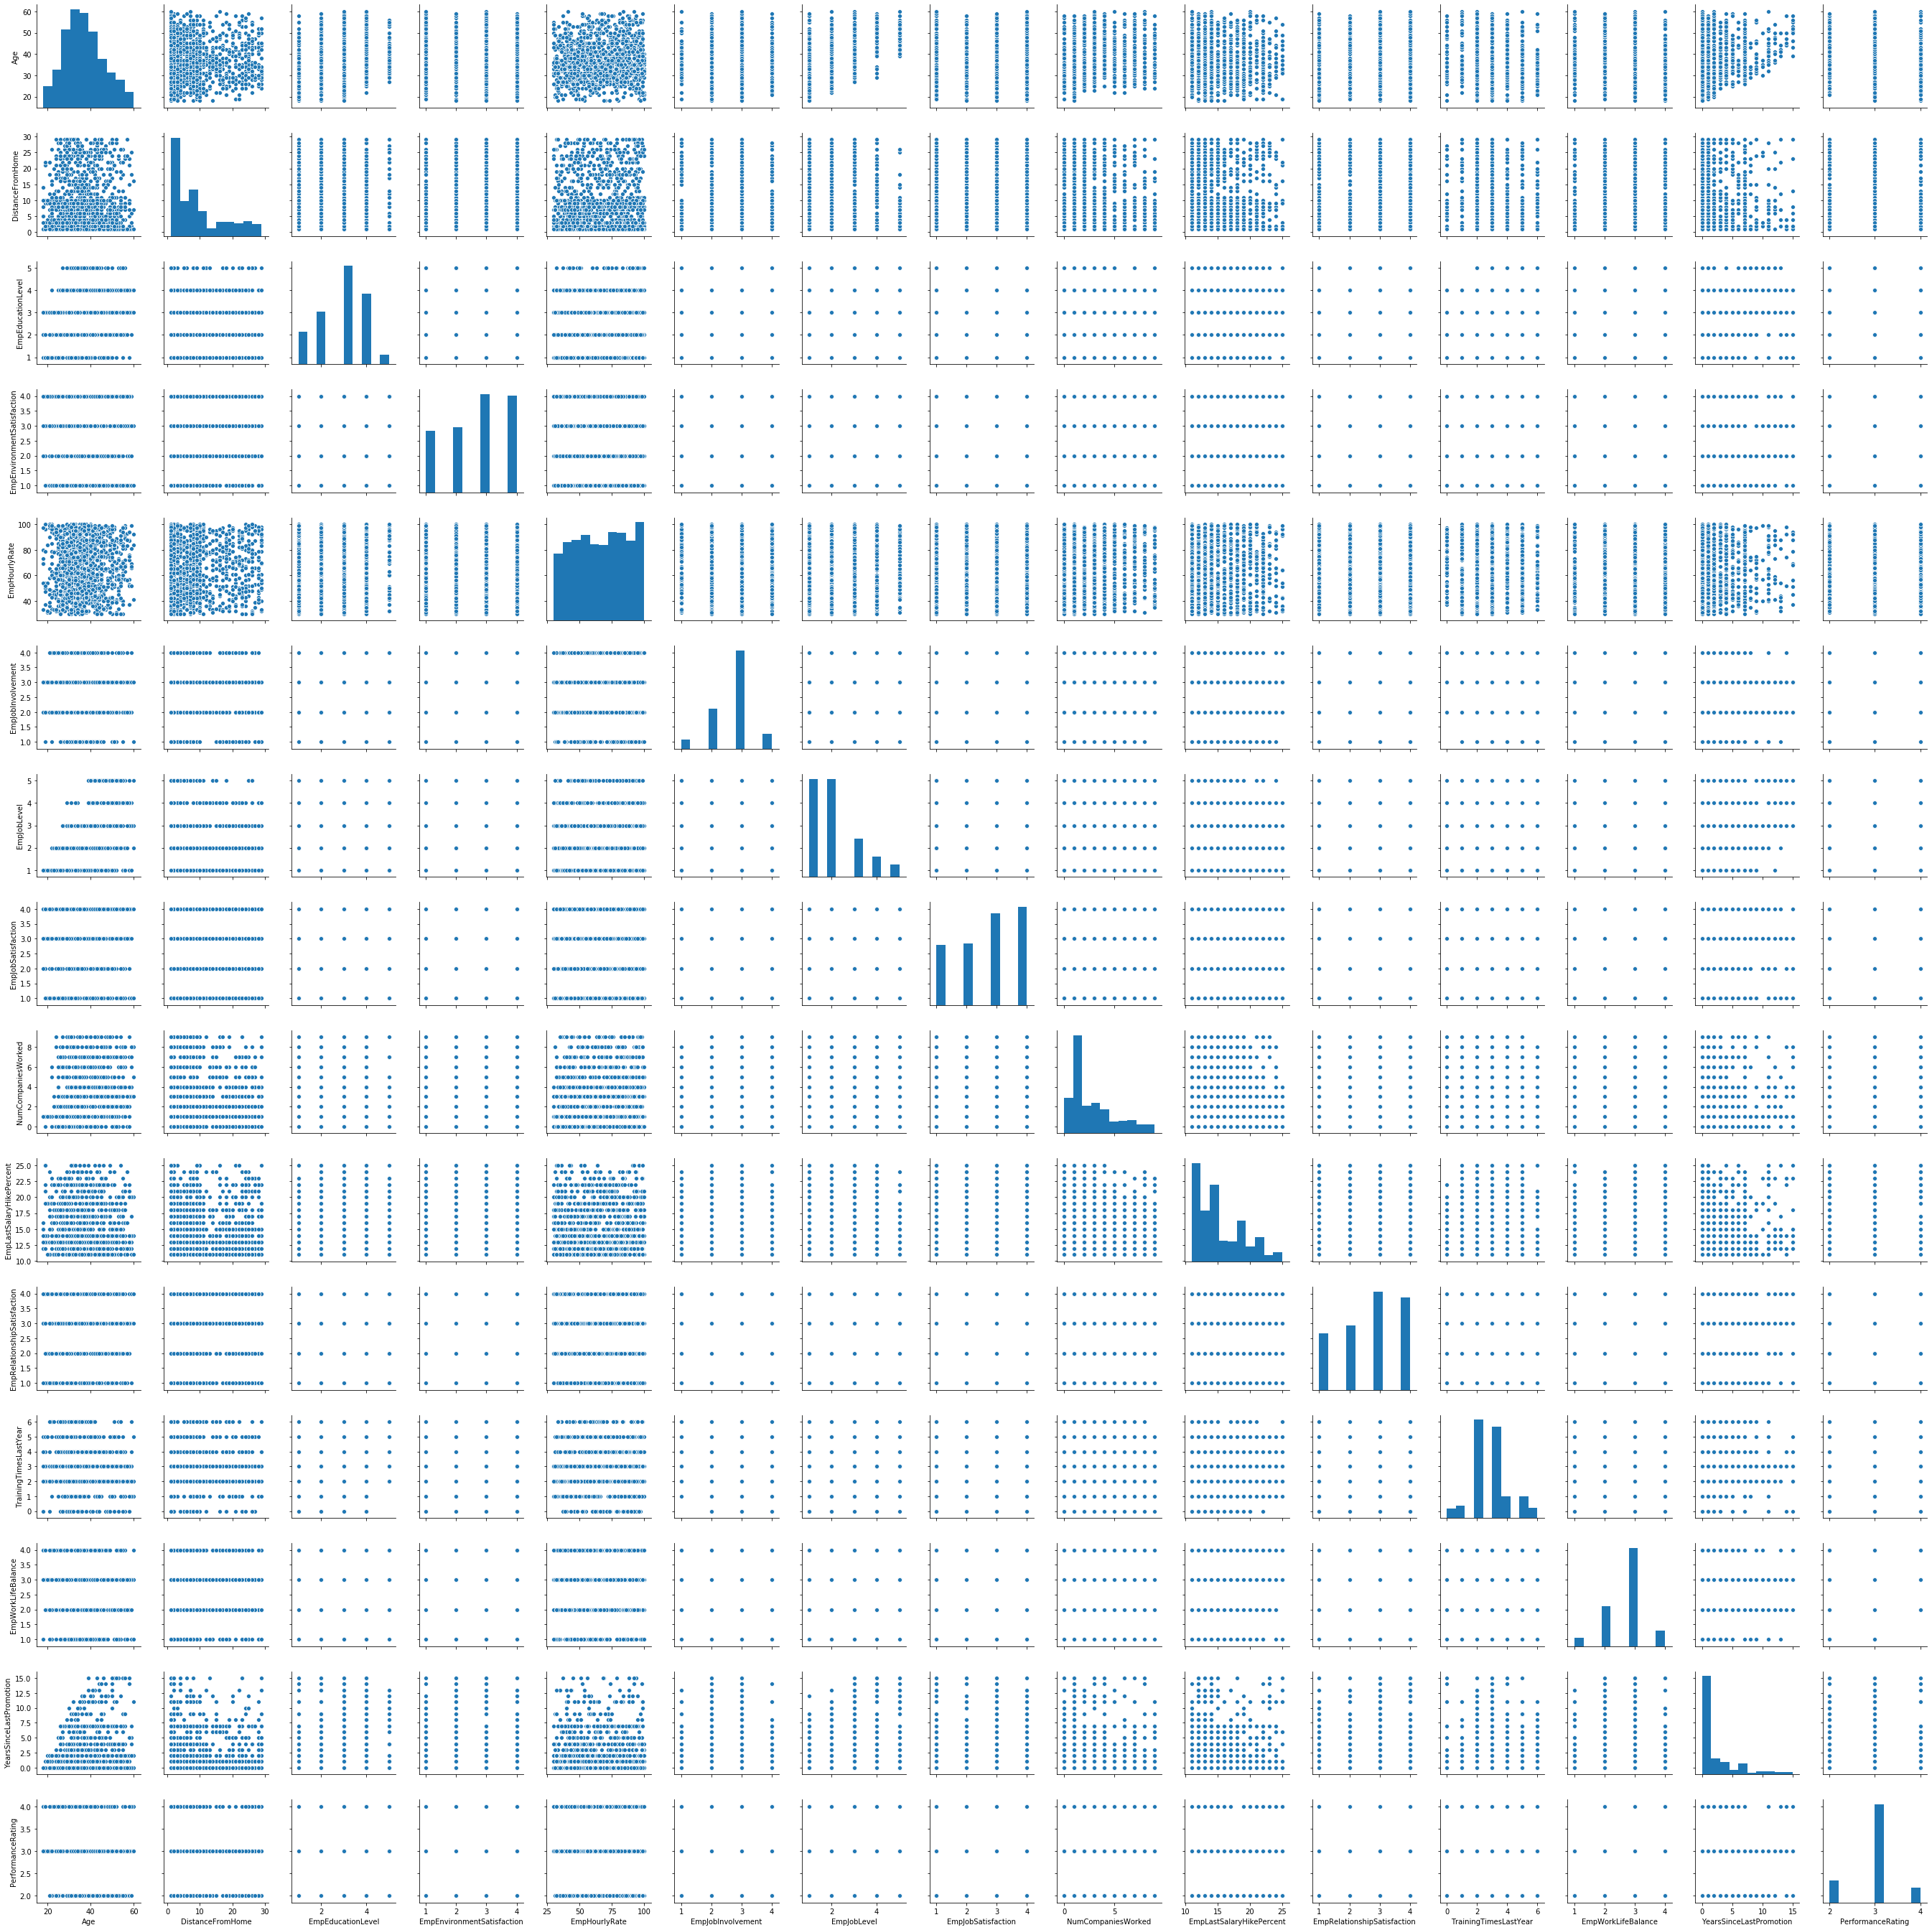

In [92]:
# Plotting pairplot for checking correlation with y variable
sns.pairplot(employee_performance,palette=sns.color_palette())
plt.show()

In [93]:
# looking for description with datatype object
employee_performance.select_dtypes(include='object')

,EmpNumber,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,OverTime,Attrition
0,E1001000,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,No,No
1,E1001006,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,No,No
2,E1001007,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Frequently,Yes,No
3,E1001009,Male,Human Resources,Divorced,Human Resources,Manager,Travel_Rarely,No,No
4,E1001010,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,No,No
...,...,...,...,...,...,...,...,...,...
1195,E100992,Female,Medical,Divorced,Sales,Sales Executive,Travel_Frequently,Yes,No
1196,E100993,Male,Life Sciences,Single,Development,Senior Developer,Travel_Rarely,No,No
1197,E100994,Male,Medical,Married,Development,Senior Developer,Travel_Rarely,Yes,No
1198,E100995,Female,Medical,Single,Data Science,Data Scientist,Travel_Rarely,No,No


### Dummy variable creation

In [94]:
# Mapping Binary variables
var = ['OverTime','Attrition','Gender']
def binary_map(x):
    return x.map({"Yes":1, "No":0,"Male":1,"Female":0})
employee_performance[var]=employee_performance[var].apply(binary_map)

In [95]:
# Looking at the head 
employee_performance.head()

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,OverTime,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TrainingTimesLastYear,EmpWorkLifeBalance,YearsSinceLastPromotion,Attrition,PerformanceRating
0,E1001000,32,1,Marketing,Single,Sales,Sales Executive,Travel_Rarely,10,3,4,55,3,2,4,1,0,12,4,2,2,0,0,3
1,E1001006,47,1,Marketing,Single,Sales,Sales Executive,Travel_Rarely,14,4,4,42,3,2,1,2,0,12,4,2,3,1,0,3
2,E1001007,40,1,Life Sciences,Married,Sales,Sales Executive,Travel_Frequently,5,4,4,48,2,3,1,5,1,21,3,2,3,1,0,4
3,E1001009,41,1,Human Resources,Divorced,Human Resources,Manager,Travel_Rarely,10,4,2,73,2,5,4,3,0,15,2,2,2,12,0,3
4,E1001010,60,1,Marketing,Single,Sales,Sales Executive,Travel_Rarely,16,4,1,84,3,2,1,8,0,14,4,1,3,2,0,3


In [96]:
# Now replace other categorical variables with dummy values.
dummy_vars = ['EducationBackground','MaritalStatus','EmpDepartment','EmpJobRole','BusinessTravelFrequency']

EducationBackground=pd.get_dummies(employee_performance['EducationBackground'],drop_first=True,prefix='Edu',prefix_sep='-').reset_index(drop=True)
MaritalStatus=pd.get_dummies(employee_performance['MaritalStatus'],drop_first=True,prefix='MStatus',prefix_sep='-').reset_index(drop=True)
EmpDepartment=pd.get_dummies(employee_performance['EmpDepartment'],drop_first=True,prefix='EDept',prefix_sep='-').reset_index(drop=True)
EmpJobRole=pd.get_dummies(employee_performance['EmpJobRole'],drop_first=True,prefix='EJobRole',prefix_sep='-').reset_index(drop=True)
BusinessTravelFrequency=pd.get_dummies(employee_performance['BusinessTravelFrequency'],drop_first=True,prefix='TraFreq',prefix_sep='-').reset_index(drop=True)

In [97]:
# Dropping original variables and concating dummy variables
employee_performance=employee_performance.drop(employee_performance[dummy_vars].columns,axis=1)
employee_performance=pd.concat([employee_performance,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency],axis=1)

In [98]:
employee_performance.head(3)

,EmpNumber,Age,Gender,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,OverTime,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TrainingTimesLastYear,EmpWorkLifeBalance,YearsSinceLastPromotion,Attrition,PerformanceRating,Edu-Life Sciences,Edu-Marketing,Edu-Medical,Edu-Other,Edu-Technical Degree,MStatus-Married,MStatus-Single,EDept-Development,EDept-Finance,EDept-Human Resources,EDept-Research & Development,EDept-Sales,EJobRole-Data Scientist,EJobRole-Delivery Manager,EJobRole-Developer,EJobRole-Finance Manager,EJobRole-Healthcare Representative,EJobRole-Human Resources,EJobRole-Laboratory Technician,EJobRole-Manager,EJobRole-Manager R&D,EJobRole-Manufacturing Director,EJobRole-Research Director,EJobRole-Research Scientist,EJobRole-Sales Executive,EJobRole-Sales Representative,EJobRole-Senior Developer,EJobRole-Senior Manager R&D,EJobRole-Technical Architect,EJobRole-Technical Lead,TraFreq-Travel_Frequently,TraFreq-Travel_Rarely
0,E1001000,32,1,10,3,4,55,3,2,4,1,0,12,4,2,2,0,0,3,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
1,E1001006,47,1,14,4,4,42,3,2,1,2,0,12,4,2,3,1,0,3,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
2,E1001007,40,1,5,4,4,48,2,3,1,5,1,21,3,2,3,1,0,4,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0


In [99]:
# Print Employee Attrition Ratio
print("Employee Attrition Ratio:")
print(employee_performance['Attrition'].value_counts()*100/employee_performance.shape[0])

Employee Attrition Ratio:
0    85.166667
1    14.833333
Name: Attrition, dtype: float64


In [100]:
employee_performance.shape

(1200, 51)

In [101]:
# Dropping Employee Number and storing it in other variable
employee_performance_EmpNumber=employee_performance.pop('EmpNumber')

In [102]:
# Looking at the head after dropping 
employee_performance.head(3)

,Age,Gender,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,OverTime,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TrainingTimesLastYear,EmpWorkLifeBalance,YearsSinceLastPromotion,Attrition,PerformanceRating,Edu-Life Sciences,Edu-Marketing,Edu-Medical,Edu-Other,Edu-Technical Degree,MStatus-Married,MStatus-Single,EDept-Development,EDept-Finance,EDept-Human Resources,EDept-Research & Development,EDept-Sales,EJobRole-Data Scientist,EJobRole-Delivery Manager,EJobRole-Developer,EJobRole-Finance Manager,EJobRole-Healthcare Representative,EJobRole-Human Resources,EJobRole-Laboratory Technician,EJobRole-Manager,EJobRole-Manager R&D,EJobRole-Manufacturing Director,EJobRole-Research Director,EJobRole-Research Scientist,EJobRole-Sales Executive,EJobRole-Sales Representative,EJobRole-Senior Developer,EJobRole-Senior Manager R&D,EJobRole-Technical Architect,EJobRole-Technical Lead,TraFreq-Travel_Frequently,TraFreq-Travel_Rarely
0,32,1,10,3,4,55,3,2,4,1,0,12,4,2,2,0,0,3,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
1,47,1,14,4,4,42,3,2,1,2,0,12,4,2,3,1,0,3,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
2,40,1,5,4,4,48,2,3,1,5,1,21,3,2,3,1,0,4,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0


### Scaling

In [103]:
scaler = StandardScaler()

In [106]:
num_vars=['Age','DistanceFromHome','EmpEducationLevel','EmpEnvironmentSatisfaction','EmpHourlyRate','EmpJobInvolvement','EmpJobLevel','EmpJobSatisfaction','NumCompaniesWorked','OverTime','EmpLastSalaryHikePercent','EmpRelationshipSatisfaction','TrainingTimesLastYear','EmpWorkLifeBalance','YearsSinceLastPromotion','PerformanceRating']
employee_performance[num_vars]=scaler.fit_transform(employee_performance[num_vars])
employee_performance.head()

,Age,Gender,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,OverTime,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TrainingTimesLastYear,EmpWorkLifeBalance,YearsSinceLastPromotion,Attrition,PerformanceRating,Edu-Life Sciences,Edu-Marketing,Edu-Medical,Edu-Other,Edu-Technical Degree,MStatus-Married,MStatus-Single,EDept-Development,EDept-Finance,EDept-Human Resources,EDept-Research & Development,EDept-Sales,EJobRole-Data Scientist,EJobRole-Delivery Manager,EJobRole-Developer,EJobRole-Finance Manager,EJobRole-Healthcare Representative,EJobRole-Human Resources,EJobRole-Laboratory Technician,EJobRole-Manager,EJobRole-Manager R&D,EJobRole-Manufacturing Director,EJobRole-Research Director,EJobRole-Research Scientist,EJobRole-Sales Executive,EJobRole-Sales Representative,EJobRole-Senior Developer,EJobRole-Senior Manager R&D,EJobRole-Technical Architect,EJobRole-Technical Lead,TraFreq-Travel_Frequently,TraFreq-Travel_Rarely
0,-0.541458,1,0.102061,0.103000,1.177978,-0.543569,0.379608,-0.060955,1.151824,-0.674538,-0.645573,-0.889111,1.185833,-0.622235,-1.064491,-0.681372,0,0.099618,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
1,1.109888,1,0.591464,1.061145,1.177978,-1.187042,0.379608,-0.060955,-1.574386,-0.269410,-0.645573,-0.889111,1.185833,-0.622235,0.365956,-0.370834,0,0.099618,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
2,0.339260,1,-0.509693,1.061145,1.177978,-0.890055,-1.035081,0.842082,-1.574386,0.945974,1.549010,1.594054,0.255768,-0.622235,0.365956,-0.370834,0,2.027702,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
3,0.449349,1,0.102061,1.061145,-0.656641,0.347393,-1.035081,2.648157,1.151824,0.135718,-0.645573,-0.061389,-0.674297,-0.622235,-1.064491,3.045084,0,0.099618,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
4,2.541054,1,0.836165,1.061145,-1.573950,0.891870,0.379608,-0.060955,-1.574386,2.161359,-0.645573,-0.337297,1.185833,-1.414051,0.365956,-0.060296,0,0.099618,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1


### Spliting data into X and y

In [107]:
y=employee_performance.pop('Attrition')
X=employee_performance

### Spliting in Train and Test

In [108]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [109]:
# print shapes of train and test sets
print("X Train :",X_train.shape)
print("y Train :",y_train.shape)
print("X Test :",X_test.shape)
print("y Test :",y_test.shape)

X Train : (840, 49)
y Train : (840,)
X Test : (360, 49)
y Test : (360,)


## Step 2: Model Building

#### Random Forest Classifier

The Random forest works on Bagging principle. It is an ensemble of Decision Trees. The bagging method is used to increases the overall results by combining weak models. How does it combine the results? In the case of Classification problem it takes the mode of the classes, predicted in the bagging process

In [113]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

#Create the model and train
model = RandomForestClassifier(random_state=100)
model.fit(X_train,y_train)

#predict the results for test
test_pred = model.predict(X_test)


## Step 3: Model Evaluation

In [114]:
#test the accuracy
accuracy_score(y_test, test_pred)

0.8583333333333333

- The model gave accuracy score of 0.85,that a good start. 
- The random forest works quite well even with the default parameters. That’s one of reason we used RF for this problem.
- Though this can be improved by tuning hyper parameters of Random Forest classifier. 
- Random forest also doesn’t over fit easily because of its randomness feature.

- One of the best feature Random forest model has- it provides the importance of variables/features in the data/model. 

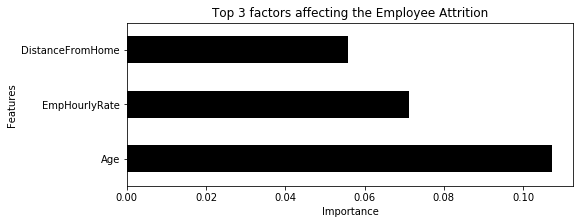

In [118]:
# check for important features 
plt.figure(figsize=(8,3))
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances = feat_importances.nlargest(3)
feat_importances.plot(kind='barh',color = 'black')
plt.title('Top 3 factors affecting the Employee Attrition')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

#### The top 3 factors effecting the employee attrition are :
    1. Age
    2. Employee hourly rate
    3. Distance from Home